In [17]:
import pandas as pd
import numpy as np

In [6]:
data1=pd.read_csv("oupeipipeizengjiabianl.csv")

In [63]:
data1.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,AwayGoals_x,AwayHalfGoals_x,AwayName,AwayTeamId_x,ChuDraw_x,ChuLose_x,ChuWin_x,...,OwinC,OdrawC,OloseC,intercept,"resultwin1,0","resultwin1,0draw","resultwin1,0lose",1/win,1/draw,1/lose
0,0,0,0,2,1,亚特兰大,493,3.4,4.0,1.9,...,0.65,-0.2,-1.1,1.0,0,0,1,0.526316,0.294118,0.25


In [64]:
data1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0_x', 'AwayGoals_x',
       'AwayHalfGoals_x', 'AwayName', 'AwayTeamId_x', 'ChuDraw_x', 'ChuLose_x',
       'ChuWin_x', 'Color_x', 'CorpId_x', 'DrawOdds_x', 'GameId_x',
       'GameName_x', 'HomeGoals_x', 'HomeHalfGoals_x', 'HomeName',
       'HomeTeamId_x', 'LoseOdds_x', 'MatchId_x', 'StartTime_x', 'WinOdds_x',
       'Unnamed: 0_y', 'AwayGoals_y', 'AwayHalfGoals_y', 'AwayTeamId_y',
       'ChuDraw_y', 'ChuLose_y', 'ChuWin_y', 'Color_y', 'CorpId_y',
       'DrawOdds_y', 'GameId_y', 'GameName_y', 'HomeGoals_y',
       'HomeHalfGoals_y', 'HomeTeamId_y', 'LoseOdds_y', 'MatchId_y',
       'StartTime_y', 'WinOdds_y', 'result', 'prowin', 'prolse', 'prodraw',
       'all', 'winoupeibianhua', 'OwinC', 'OdrawC', 'OloseC', 'intercept',
       'resultwin1,0', 'resultwin1,0draw', 'resultwin1,0lose', '1/win',
       '1/draw', '1/lose'],
      dtype='object')

In [77]:
data1["result"]

0      0
1      1
2      1
3      1
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     1
16     1
17     2
18     1
19     2
20     1
21     2
22     0
23     0
24     0
25     0
26     2
27     1
28     2
29     2
      ..
891    1
892    1
893    1
894    1
895    1
896    0
897    0
898    0
899    0
900    0
901    2
902    2
903    2
904    0
905    0
906    0
907    1
908    1
909    1
910    0
911    0
912    0
913    0
914    0
915    0
916    0
917    1
918    1
919    0
920    0
Name: result, Length: 921, dtype: int64

In [12]:
#增加了所有变量
data1["prowin"]=1-(1/data1['WinOdds_y'])*data1['WinOdds_x']
data1["prolse"]=1-(1/data1['LoseOdds_y'])*data1['LoseOdds_x']
data1["prodraw"]=1-(1/data1['DrawOdds_y'])*data1['DrawOdds_x']
data1["OwinC"]=data1['WinOdds_x']-data1['ChuWin_x']
data1["OdrawC"]=data1['DrawOdds_x']-data1['ChuDraw_x']
data1["OloseC"]=data1['LoseOdds_x']-data1['ChuLose_x']

data1["intercept"]=1.0




In [62]:
data1["1/win"]=1/data1["ChuWin_x"]
data1["1/draw"]=1/data1["ChuDraw_x"]
data1["1/lose"]=1/data1["ChuLose_x"]

In [31]:
#处理只要赢就是1，输球和平球都是0.    
res=data1["result"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(data1["result"]),1):
    if res[i]==2:
        res[i]=1
    else:
        res[i]=0
data1["resultwin1,0"]=res


In [11]:
import statsmodels.api as sm

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [69]:
#指定作为训练变量的列
train_cols1 = data1.columns[[55,56,57,43,45,44,48,49,50,51]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit1=sm.Logit(data1["resultwin1,0"], data1[train_cols1])

# 拟合模型
result1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.561771
         Iterations 6


In [70]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:           resultwin1,0   No. Observations:                  921
Model:                          Logit   Df Residuals:                      911
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                 0.05921
Time:                        17:26:25   Log-Likelihood:                -517.39
converged:                       True   LL-Null:                       -549.96
                                        LLR p-value:                 1.362e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1/win         -3.5336      4.251     -0.831      0.406     -11.866       4.799
1/draw       -14.5058      5.984     -2.424      0.015     -26.234      -2.777
1/lose        -9.0104      4.069     -2.214      0.0

In [40]:
#处理只要平局就是1，输球和赢球都是0.    
res=data1["result"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(data1["result"]),1):
    if res[i]==1:
        res[i]=1
    else:
        res[i]=0
data1["resultwin1,0draw"]=res

In [71]:
#指定作为训练变量的列
train_cols2 = data1.columns[[55,56,57,43,45,44,48,49,50,51]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit2=sm.Logit(data1["resultwin1,0draw"], data1[train_cols2])

# 拟合模型
result2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.551198
         Iterations 5


In [72]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:       resultwin1,0draw   No. Observations:                  921
Model:                          Logit   Df Residuals:                      911
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                 0.01928
Time:                        17:29:00   Log-Likelihood:                -507.65
converged:                       True   LL-Null:                       -517.64
                                        LLR p-value:                   0.01813
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1/win          6.6183      4.126      1.604      0.109      -1.469      14.706
1/draw        12.2260      5.838      2.094      0.036       0.784      23.668
1/lose         8.1001      3.891      2.082      0.0

In [41]:
#处理只要输球就是1，平球和赢球都是0.    
res=data1["result"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(data1["result"]),1):
    if res[i]==0:
        res[i]=1
    else:
        res[i]=0
data1["resultwin1,0lose"]=res

In [73]:
#指定作为训练变量的列
train_cols3 = data1.columns[[55,56,57,43,45,44,48,49,50,51]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit3=sm.Logit(data1["resultwin1,0lose"], data1[train_cols3])

# 拟合模型
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.657249
         Iterations 5


In [74]:
print(result3.summary())

                           Logit Regression Results                           
Dep. Variable:       resultwin1,0lose   No. Observations:                  921
Model:                          Logit   Df Residuals:                      911
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Jan 2018   Pseudo R-squ.:                 0.04858
Time:                        17:31:11   Log-Likelihood:                -605.33
converged:                       True   LL-Null:                       -636.23
                                        LLR p-value:                 5.993e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1/win         -3.7606      3.692     -1.019      0.308     -10.996       3.475
1/draw         2.9411      5.284      0.557      0.578      -7.415      13.297
1/lose         0.3341      3.503      0.095      0.9

In [75]:
import copy
combos = copy.deepcopy(data1)
predict_cols = combos.columns[[55,56,57,43,45,44,48,49,50,51]]
combos['predictwin'] = result1.predict(combos[predict_cols])
combos['predictdraw'] = result2.predict(combos[predict_cols])
combos['predictlose'] = result3.predict(combos[predict_cols])

In [98]:
combos.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,AwayGoals_x,AwayHalfGoals_x,AwayName,AwayTeamId_x,ChuDraw_x,ChuLose_x,ChuWin_x,...,intercept,"resultwin1,0","resultwin1,0draw","resultwin1,0lose",1/win,1/draw,1/lose,predictwin,predictdraw,predictlose
0,0,0,0,2,1,亚特兰大,493,3.4,4.0,1.9,...,1.0,0,0,1,0.526316,0.294118,0.25,0.701873,0.165816,0.195783


In [80]:
import numpy as np
predict=np.array([[0.5,0.57],[0.55,0.63],[0.6,0.66],[]])
predict

array([[ 0.5 ,  0.57],
       [ 0.55,  0.63]])

In [91]:
preall=0
preau=0
list1=[]
for i in range(50,95,1):
    
    for index,row in combos.iterrows():
        big=row["predictwin"]
        re=2
        if row["predictwin"]<=row["predictdraw"]:
            big=row["predictwin"]
            re=1
        if big<=row["predictlose"]:
            big=row["predictlose"]
            re=0
        if big>=i/100:
            preall+=1
            if row["result"]==re:
                preau+=1
    
    list1.append(i/100)  
    list1.append(preau/preall)

    
        
    
    
list1

[0.5,
 0.5744234800838575,
 0.51,
 0.5797413793103449,
 0.52,
 0.5907365223993926,
 0.53,
 0.594883997620464,
 0.54,
 0.5998018821198613,
 0.55,
 0.6041576440017323,
 0.56,
 0.6073237241916635,
 0.57,
 0.6111903064861012,
 0.58,
 0.6154100529100529,
 0.59,
 0.6183635227982511,
 0.6,
 0.6199581714968628,
 0.61,
 0.6204211133544851,
 0.62,
 0.6220848552964315,
 0.63,
 0.6234550947541884,
 0.64,
 0.6239224137931034,
 0.65,
 0.6248341735208278,
 0.66,
 0.6255564283843938,
 0.67,
 0.6259720062208398,
 0.68,
 0.6267352185089974,
 0.69,
 0.6268199233716475,
 0.7,
 0.626144455747711,
 0.71,
 0.626078132927448,
 0.72,
 0.6257280324132691,
 0.73,
 0.6254425897824988,
 0.74,
 0.6249684104119282,
 0.75,
 0.6246526900732509,
 0.76,
 0.624337288563494,
 0.77,
 0.6240222053999496,
 0.78,
 0.6237074401008827,
 0.79,
 0.6233929921855307,
 0.8,
 0.6230788611740993,
 0.81,
 0.6230788611740993,
 0.82,
 0.6230788611740993,
 0.83,
 0.6230788611740993,
 0.84,
 0.6230788611740993,
 0.85,
 0.6230788611740993,


In [95]:
a1.size

90

In [99]:
a1=np.array(list1)
a1=a1.reshape(45,2)
dfa1=pd.DataFrame(a1)

In [103]:
dfa1.head(1)

,0,1
0,0.5,0.574423


In [102]:
import matplotlib.pyplot as plt

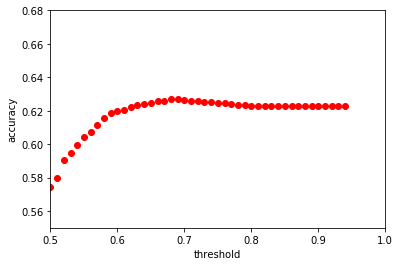

In [108]:
plt.plot(dfa1.iloc[:,0],dfa1.iloc[:,1],"ro")
plt.axis([0.5,1,0.55,0.68])
plt.ylabel("accuracy")
plt.xlabel("threshold")
plt.show()

In [86]:
a=[]
a.append(1)
a.append(2)
a

[1, 2]

In [110]:
combos.shape

(921, 61)

In [113]:
combos.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0_x', 'AwayGoals_x',
       'AwayHalfGoals_x', 'AwayName', 'AwayTeamId_x', 'ChuDraw_x', 'ChuLose_x',
       'ChuWin_x', 'Color_x', 'CorpId_x', 'DrawOdds_x', 'GameId_x',
       'GameName_x', 'HomeGoals_x', 'HomeHalfGoals_x', 'HomeName',
       'HomeTeamId_x', 'LoseOdds_x', 'MatchId_x', 'StartTime_x', 'WinOdds_x',
       'Unnamed: 0_y', 'AwayGoals_y', 'AwayHalfGoals_y', 'AwayTeamId_y',
       'ChuDraw_y', 'ChuLose_y', 'ChuWin_y', 'Color_y', 'CorpId_y',
       'DrawOdds_y', 'GameId_y', 'GameName_y', 'HomeGoals_y',
       'HomeHalfGoals_y', 'HomeTeamId_y', 'LoseOdds_y', 'MatchId_y',
       'StartTime_y', 'WinOdds_y', 'result', 'prowin', 'prolse', 'prodraw',
       'all', 'winoupeibianhua', 'OwinC', 'OdrawC', 'OloseC', 'intercept',
       'resultwin1,0', 'resultwin1,0draw', 'resultwin1,0lose', '1/win',
       '1/draw', '1/lose', 'predictwin', 'predictdraw', 'predictlose'],
      dtype='object')

In [140]:

list2=[]
for i in range(0,40,1):   
    money=0
    for index,row in combos.iterrows():
        l1=[(row['predictwin']-1/row['ChuWin_x']),(row['predictdraw']-1/row['ChuDraw_x']),(row['predictlose']-1/row['ChuLose_x'])]
        if max(l1)>i/100:
            b=l1.index(max(l1))
            if b==0:
                if row["result"]==2:
                    money=money+(row['ChuWin_x']-1)
                else:
                    money=money-1
            if b==1:
                if row["result"]==1:
                    money=money+(row['ChuDraw_x']-1)
                else:
                    money=money-1
            if b==2:
                if row["result"]==0:
                    money=money+(row['ChuLose_x']-1)
                else:
                    money=money-1
    list2.append(i/100)
    list2.append(money)
                
        
        
list2  

[0.0,
 166.9699999999999,
 0.01,
 112.06999999999992,
 0.02,
 110.18999999999991,
 0.03,
 138.47999999999996,
 0.04,
 147.30999999999995,
 0.05,
 132.99999999999997,
 0.06,
 93.09,
 0.07,
 64.19,
 0.08,
 6.57,
 0.09,
 5.85,
 0.1,
 16.949999999999996,
 0.11,
 26.4,
 0.12,
 12.799999999999997,
 0.13,
 15.75,
 0.14,
 12.399999999999999,
 0.15,
 14.399999999999999,
 0.16,
 9.899999999999999,
 0.17,
 7.799999999999999,
 0.18,
 6.799999999999999,
 0.19,
 4.199999999999999,
 0.2,
 4.2,
 0.21,
 4.2,
 0.22,
 4.2,
 0.23,
 4.2,
 0.24,
 4.2,
 0.25,
 4.2,
 0.26,
 4.2,
 0.27,
 4.2,
 0.28,
 0,
 0.29,
 0,
 0.3,
 0,
 0.31,
 0,
 0.32,
 0,
 0.33,
 0,
 0.34,
 0,
 0.35,
 0,
 0.36,
 0,
 0.37,
 0,
 0.38,
 0,
 0.39,
 0]

In [153]:
al2=np.array(list2)
al2=al2.reshape(40,2)
dfal2=pd.DataFrame(al2)

In [152]:
dfal2.shape

(80, 1)

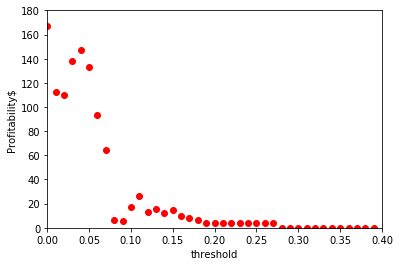

In [155]:
plt.plot(dfal2.iloc[:,0],dfal2.iloc[:,1],"ro")
plt.axis([0,0.4,0,180])
plt.ylabel("Profitability$")
plt.xlabel("threshold")
plt.show()

In [114]:
c = [-10,-5,0,5,3,10,15,-20,25]

print(c.index(min(c)))

7


In [112]:
combos.to_csv("reprot result.csv",encoding="utf_8_sig")